In [1]:
import pandas as pd

bank = pd.read_csv("bank-full.csv", sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 어쩌다 데이터 분석

In [24]:
# 데이터 필터링
bank[bank['y'] == 'no'].head() #마케팅 수신 미동의자

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
# loc 조건부 필터링
# 40대 이상 마케팅 동의자: 나이, 직업, 교육만 확인
bank.loc[(bank.age >= 40) & (bank.y == 'yes'), ['age', 'job', 'education']] 

,age,job,education
83,59,admin.,secondary
86,56,admin.,secondary
87,41,technician,secondary
129,55,services,secondary
168,54,admin.,tertiary
...,...,...,...
45201,53,management,tertiary
45204,73,retired,secondary
45206,51,technician,tertiary
45207,71,retired,primary


In [14]:
#isin 필터링
# 실직 상태이거나 은퇴한 사람
bank[bank.job.isin(['unemployed', 'retired'])].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
15,51,retired,married,primary,no,229,yes,no,unknown,5,may,353,1,-1,0,unknown,no
18,60,retired,married,primary,no,60,yes,no,unknown,5,may,219,1,-1,0,unknown,no
24,40,retired,married,primary,no,0,yes,yes,unknown,5,may,181,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no


In [15]:
# 실직 상태이거나 은퇴하지 않은  사람
bank[~bank.job.isin(['unemployed', 'retired'])].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
# query
# poutcome이 success이고 35세이며 마케팅 수신에 동의한 사람
bank.query('poutcome == "success" & age == 35 & y == "yes"').head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
33965,35,management,single,tertiary,no,1750,yes,no,cellular,30,apr,687,1,9,3,success,yes
34475,35,student,single,secondary,no,188,yes,no,cellular,5,may,863,1,78,8,success,yes
36756,35,blue-collar,single,secondary,no,855,yes,no,cellular,12,may,549,1,300,1,success,yes
40053,35,services,married,secondary,no,52,yes,no,cellular,4,jun,328,2,94,4,success,yes
40128,35,admin.,divorced,secondary,no,1085,no,no,cellular,5,jun,199,1,86,7,success,yes


In [20]:
# 데이터 정렬
bank.sort_values(by = ['age', 'balance']).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41273,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
41252,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
41222,18,student,single,unknown,no,35,no,no,telephone,21,aug,104,2,-1,0,unknown,no
40744,18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
41487,18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes


In [28]:
# nlargest
# 마케팅 수신 동의자 중에서 balance가 가장 큰 10명
bank[bank.y == 'yes'].nlargest(n = 10, columns = 'balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
40763,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
43053,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
34170,29,management,single,tertiary,no,36252,yes,no,cellular,30,apr,501,1,-1,0,unknown,yes
20737,32,technician,single,tertiary,no,34646,no,no,telephone,13,aug,618,9,-1,0,unknown,yes
31222,61,retired,married,tertiary,no,32685,no,no,cellular,2,mar,1447,2,-1,0,unknown,yes
44232,45,management,married,tertiary,no,31472,no,no,cellular,19,jul,568,7,-1,0,unknown,yes
43290,77,retired,married,primary,no,29340,no,no,cellular,15,mar,257,1,91,2,other,yes


In [29]:
# nsmallest
# 마케팅 수신 동의자 중에서 balance가 가장 작은 10명
bank[bank.y == 'yes'].nsmallest(n = 10, columns = 'balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,-1,0,unknown,yes
35392,51,technician,married,secondary,no,-1944,yes,no,cellular,7,may,623,1,-1,0,unknown,yes
40267,56,retired,married,secondary,no,-1206,yes,no,cellular,15,jun,382,2,-1,0,unknown,yes
8218,42,technician,single,secondary,yes,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
9442,28,technician,single,secondary,yes,-1042,yes,no,unknown,6,jun,712,2,-1,0,unknown,yes
29792,52,management,married,tertiary,no,-970,yes,no,cellular,4,feb,489,1,-1,0,unknown,yes
37710,26,admin.,single,secondary,yes,-930,yes,no,cellular,14,may,786,1,-1,0,unknown,yes
39154,26,blue-collar,single,primary,no,-887,yes,no,cellular,18,may,827,2,-1,0,unknown,yes
14932,40,blue-collar,married,secondary,no,-839,yes,yes,cellular,16,jul,1018,2,-1,0,unknown,yes
19669,46,technician,divorced,secondary,no,-824,yes,no,cellular,7,aug,429,3,-1,0,unknown,yes


In [21]:
bank.isna().sum() #결측값 없음

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Text(0.5, 1.0, 'Outlier of Age')

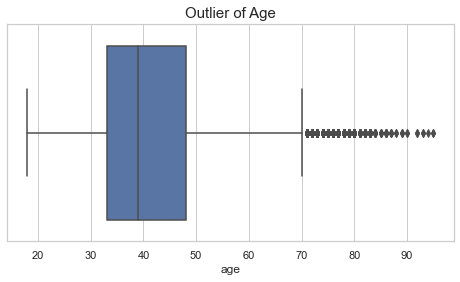

In [32]:
# 이상치 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8,4))
sns.boxplot(x = bank.age)
plt.title("Outlier of Age", size = 15)

Text(0.5, 1.0, 'Outlier of Balance')

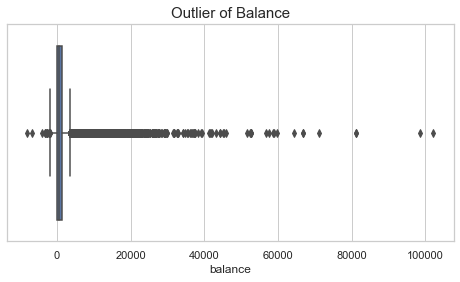

In [34]:
plt.figure(figsize = (8,4))
sns.boxplot(x = bank.balance)
plt.title("Outlier of Balance", size = 15)

Text(0.5, 1.0, 'Outlier of Duration')

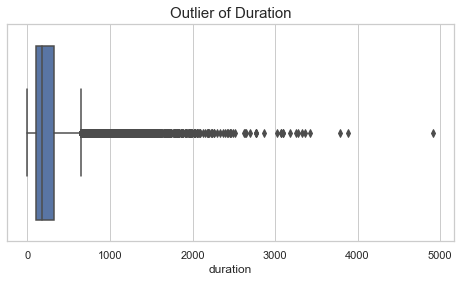

In [35]:
plt.figure(figsize = (8,4))
sns.boxplot(x = bank.duration)
plt.title("Outlier of Duration", size = 15)

Text(0.5, 1.0, 'Outlier of Campaign')

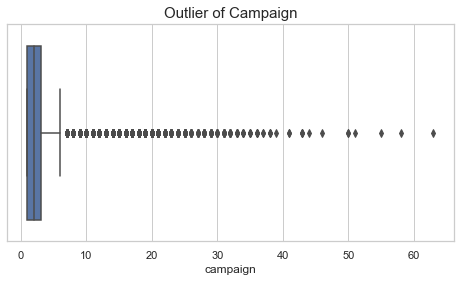

In [36]:
plt.figure(figsize = (8,4))
sns.boxplot(x = bank.campaign)
plt.title("Outlier of Campaign", size = 15)

Text(0.5, 1.0, 'Outlier of Pdays')

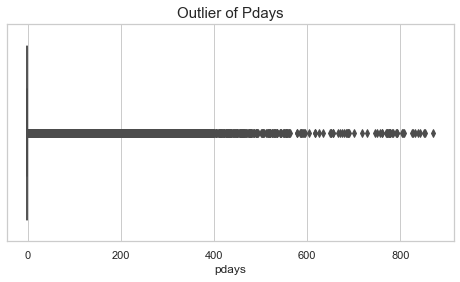

In [37]:
plt.figure(figsize = (8,4))
sns.boxplot(x = bank.pdays)
plt.title("Outlier of Pdays", size = 15)

Text(0.5, 1.0, 'Outlier of Previous')

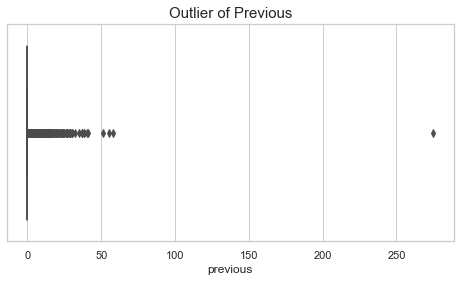

In [38]:
plt.figure(figsize = (8,4))
sns.boxplot(x = bank.previous)
plt.title("Outlier of Previous", size = 15)

In [88]:
# IQR로 이상치 확인
def iqr(data, column):
    global lower, upper
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    print("IQR은 ", iqr)
    print('lower 기준값은 ', lower)
    print('upper 기준값은 ', upper)
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    return print("총 이상값 개수는 ", data1.shape[0] + data2.shape[0], "이다")

In [89]:
import numpy as np
l = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# 각 컬럼의 이상치 개수 확인
for i in l:
    print(i, "의 경우, ")
    iqr(bank, i)
    print("-" * 50)

age 의 경우, 
IQR은  15.0
lower 기준값은  10.5
upper 기준값은  70.5
총 이상값 개수는  487 이다
--------------------------------------------------
balance 의 경우, 
IQR은  1356.0
lower 기준값은  -1962.0
upper 기준값은  3462.0
총 이상값 개수는  4729 이다
--------------------------------------------------
duration 의 경우, 
IQR은  216.0
lower 기준값은  -221.0
upper 기준값은  643.0
총 이상값 개수는  3235 이다
--------------------------------------------------
campaign 의 경우, 
IQR은  2.0
lower 기준값은  -2.0
upper 기준값은  6.0
총 이상값 개수는  3064 이다
--------------------------------------------------
pdays 의 경우, 
IQR은  0.0
lower 기준값은  -1.0
upper 기준값은  -1.0
총 이상값 개수는  8257 이다
--------------------------------------------------
previous 의 경우, 
IQR은  0.0
lower 기준값은  0.0
upper 기준값은  0.0
총 이상값 개수는  8257 이다
--------------------------------------------------


IQR은  15.0
lower 기준값은  10.5
upper 기준값은  70.5
총 이상값 개수는  487 이다


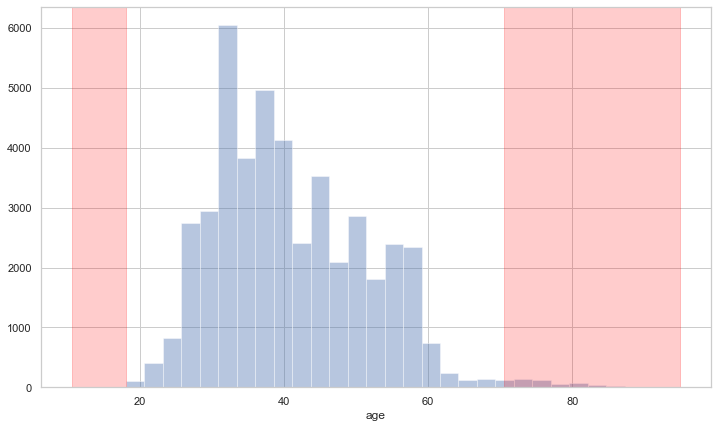

In [97]:
plt.figure(figsize = (12,7))
iqr(bank, 'age')

# Age 이상치 시각화
sns.distplot(bank.age, bins = 30, kde = False)
plt.axvspan(xmin = lower, xmax = bank.age.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = bank.age.max(), alpha = 0.2, color = 'red')
plt.show()

IQR은  1356.0
lower 기준값은  -1962.0
upper 기준값은  3462.0
총 이상값 개수는  4729 이다


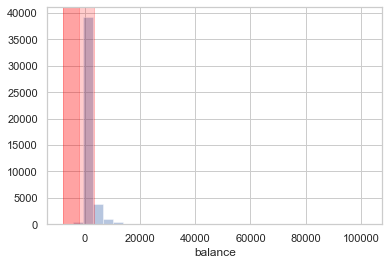

In [98]:
# balance 이상치 시각화
iqr(bank, 'balance')

sns.distplot(bank.balance, bins = 30, kde = False)
plt.axvspan(xmin = lower, xmax = bank.balance.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = bank.balance.min(), alpha = 0.2, color = 'red')
plt.show()

IQR은  216.0
lower 기준값은  -221.0
upper 기준값은  643.0
총 이상값 개수는  3235 이다


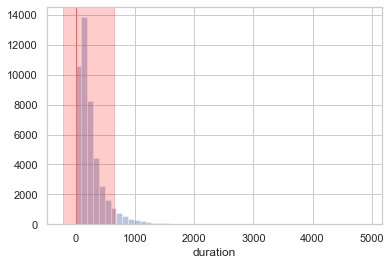

In [99]:
# duration 이상치 시각화
iqr(bank, 'duration')

sns.distplot(bank.duration, bins = 50, kde = False)
plt.axvspan(xmin = lower, xmax = bank.duration.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = bank.duration.min(), alpha = 0.2, color = 'red')
plt.show()

IQR은  2.0
lower 기준값은  -2.0
upper 기준값은  6.0
총 이상값 개수는  3064 이다


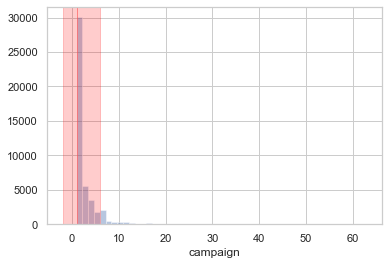

In [100]:
# campaign 이상치 시각화
iqr(bank, 'campaign')

sns.distplot(bank.campaign, bins = 50, kde = False)
plt.axvspan(xmin = lower, xmax = bank.campaign.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = bank.campaign.min(), alpha = 0.2, color = 'red')
plt.show()

IQR은  0.0
lower 기준값은  -1.0
upper 기준값은  -1.0
총 이상값 개수는  8257 이다


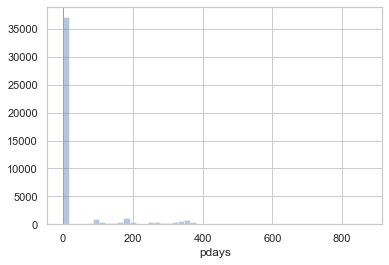

In [101]:
# pdays 이상치 시각화
iqr(bank, 'pdays')

sns.distplot(bank.pdays, bins = 50, kde = False)
plt.axvspan(xmin = lower, xmax = bank.pdays.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = bank.pdays.min(), alpha = 0.2, color = 'red')
plt.show()

IQR은  0.0
lower 기준값은  0.0
upper 기준값은  0.0
총 이상값 개수는  8257 이다


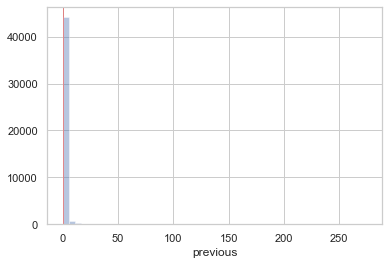

In [102]:
# previous 이상치 시각화
iqr(bank, 'previous')

sns.distplot(bank.previous, bins = 50, kde = False)
plt.axvspan(xmin = lower, xmax = bank.previous.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = bank.previous.min(), alpha = 0.2, color = 'red')
plt.show()

In [104]:
# 이상치 대체
iqr(bank, 'age')

outlier = bank[~(bank['age'] < upper) & (bank['age'] > lower)]
outlier_index = [outlier.index]

IQR은  15.0
lower 기준값은  10.5
upper 기준값은  70.5
총 이상값 개수는  487 이다


In [105]:
outlier_index

[Int64Index([29158, 29261, 29263, 29322, 29865, 30225, 30264, 30908, 31051,
             31052,
             ...
             45101, 45104, 45109, 45118, 45141, 45163, 45191, 45204, 45207,
             45208],
            dtype='int64', length=487)]

In [106]:
# 평균을 반올림한 값으로 대체
bank.iloc[outlier_index, 0] = round(bank['age'].mean(), 0)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [78]:
# 문자열 데이터 타입 string으로 변환
bank.job = bank.job.astype("string")
bank.marital = bank.marital.astype("string")
bank.education = bank.education.astype("string")
bank.default = bank.default.astype("string")
bank.housing = bank.housing.astype("string")
bank.loan = bank.loan.astype("string")
bank.contact = bank.contact.astype("string")
bank.month = bank.month.astype("string")
bank.poutcome = bank.poutcome.astype("string")
bank.y = bank.y.astype("string")

In [107]:
# 카테고리 데이터 처리
print(bank.age.min())
print(bank.age.max())

18
70


In [108]:
bins = [18,29,39,49,59] #구분 지점
labels = ['20s', '30s', '40s', 'over 50s']

bank['age_cut'] = pd.cut(bank['age'], bins = bins, labels = labels)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,over 50s
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40s
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30s
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40s
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30s


In [109]:
bank['age_cut'].value_counts() #고유 개수 확인

30s         18089
40s         12142
over 50s     8410
20s          5261
Name: age_cut, dtype: int64

In [110]:
bank['age_cut'].value_counts().to_frame().style.background_gradient(cmap = 'viridis')

,age_cut
30s,18089
40s,12142
over 50s,8410
20s,5261


In [111]:
# 비율대로 카테고리화
bank['age_qcut'] = pd.qcut(bank.age, q = 4, labels = labels)
bank.head() #결과 확인

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut,age_qcut
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,over 50s,over 50s
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40s,40s
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30s,20s
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40s,40s
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30s,20s


In [112]:
bank['age_qcut'].value_counts().to_frame().style.background_gradient(cmap = 'viridis')

,age_qcut
20s,13083
40s,11148
over 50s,10701
30s,10279


In [4]:
# 카테고리 데이터에 순서 만들기
bank.y = bank.y.astype('category')
bank.y = bank.y.cat.set_categories(['yes', 'no'], ordered = True)

In [5]:
bank.y.sort_values()

26839    yes
27541    yes
33877    yes
3999     yes
33876    yes
        ... 
15347     no
15348     no
15349     no
15340     no
45210     no
Name: y, Length: 45211, dtype: category
Categories (2, object): ['yes' < 'no']

In [117]:
# 람다 적용
# unemployed, student, retire -> no income
bank['job'].apply(lambda x: 'no income' if (x == 'unemployed') or (x == 'studnet') or (x == 'retired') else 'income')

0           income
1           income
2           income
3           income
4           income
           ...    
45206       income
45207    no income
45208    no income
45209       income
45210       income
Name: job, Length: 45211, dtype: object

### 혼자 공부하는 데이터 분석

#### 기술 통계(요약 통계)
- 자료의 내용을 압축하여 설명
- describe(): 데이터 개수, 평균, 표준편차, 최솟값, 중앙값, 최댓값
- describe(percentiles = [n, m]): n%, m%에 위치한 값을 보고 싶은 경우
- describe(include = 'object'): object 타입의 기술 통계가 보고 싶은 경우
<br>

- mean, median, min, max, quantile, var, std, mode ... : 관련 메서드
- df[col].drop_duplicates().median(): 중복값을 제거하고 중앙값을 구하는 경우
- quantile: interpolation 매개변수에서 중간값을 계산하는 방법 사용
> 보간: 두 지점 사이에 놓인 특정 위치의 값을 구하는 방법 <br>
> 반대로 백분위를 찾는 경우
>> df2 = df[col] < 특정 숫자 <br>
>> df2.mean() : 특정 숫자보다 작은 값이 차지하는 비율
- 관련 메서드를 데이터프레임에 적용할 경우: numeric_only = True
<br>

- numpy 메서드: mean과 average 모두 제공
- average: weights 매개변수에 가중치를 제공할 경우 가중 평균 계산
- percentile: 백분위를 0~100 사이로 지정. quantile과 동일
- var
> pandas: 자유도로 나누어 계산 <br>
> numpy: 데이터 개수 n으로 나누어 계산 <br>
> ddof 매개변수: 자유도 차감값 지정. std에도 이용 가능
- unique
> return_counts = True: 고유값의 등장 횟수 반환
- argmax: 가장 큰 값의 인덱스 반환

In [124]:
# pedalme 데이터에 적용
pedal = pd.read_csv("pedalme_features.csv")
pedal.head()

,Unnamed: 0,year,week,location,time,demand
0,15,2020,22,0,0,12
1,16,2020,22,1,0,2
2,17,2020,22,2,0,0
3,18,2020,22,3,0,1
4,19,2020,22,4,0,0


In [125]:
pedal.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [126]:
pedal.describe() #기술통계량 확인

,year,week,location,time,demand
count,540.000000,540.000000,540.0000,540.000000,540.000000
mean,2020.138889,32.277778,7.0000,17.500000,27.809259
std,0.346151,14.415536,4.3245,10.397927,30.993965
min,2020.000000,1.000000,0.0000,0.000000,0.000000
25%,2020.000000,25.750000,3.0000,8.750000,8.000000
50%,2020.000000,34.500000,7.0000,17.500000,16.000000
75%,2020.000000,43.250000,11.0000,26.250000,35.000000
max,2021.000000,52.000000,14.0000,35.000000,184.000000


In [128]:
pedal.drop_duplicates().median() #중복값 제외, 모든 컬럼의 중앙값 확인

year        2020.0
week          34.5
location       7.0
time          17.5
demand        16.0
dtype: float64

In [143]:
pedal.std() #pandas의 std는 describe의 std와 동일한 것 확인

year         0.346151
week        14.415536
location     4.324500
time        10.397927
demand      30.993965
dtype: float64

In [144]:
np.std(pedal) #numpy의 std는 pandas와 다른 것 확인

year         0.345831
week        14.402182
location     4.320494
time        10.388295
demand      30.965254
dtype: float64

In [147]:
pedal.std(ddof = 0) # numpy와 동일

year         0.345831
week        14.402182
location     4.320494
time        10.388295
demand      30.965254
dtype: float64

In [148]:
pedal.std(ddof = 1) # pandas와 동일

year         0.346151
week        14.415536
location     4.324500
time        10.397927
demand      30.993965
dtype: float64

In [130]:
pedal.demand.quantile(0.75) #Q3 확인

35.0

In [132]:
pedal2 = pedal['demand'] < 35
pedal2.mean() # Q3보다 작은 데이터의 비율

0.7444444444444445

In [142]:
# 보간 방식이 바뀌어도 동일

# midpoint: 분위수에 관계없이 두 수 사이의 중앙값 사용
print("midpoint: ", pedal.demand.quantile(0.6, interpolation = 'midpoint'))
# nearest: 두 수 중에서 가까운 값 선택
print("nearest: ", pedal.demand.quantile(0.6, interpolation = 'nearest'))
# lower: 두 수 중에서 작은 값 선택
print("lower: ", pedal.demand.quantile(0.6, interpolation = 'lower'))
# higher: 두 수 중에서 큰 값 선택
print("higher: ",pedal.demand.quantile(0.6, interpolation = 'higher'))

midpoint:  22.0
nearest:  22
lower:  22
higher:  22


In [156]:
val, cnt = np.unique(pedal.location, return_counts = True) # location 고유값과 개수 계산
max_id = np.argmax(cnt) # 가장 고유값이 많은 인덱스
val[max_id] # 확인

0

In [157]:
np.unique(pedal.location, return_counts = True) # 모든 location의 개수가 동일하기 때문에 첫 번째 값을 출력

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),
 array([36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36],
       dtype=int64))